In [1]:
import sys
sys.path.append("./../helper/") 
from common_imports import *
from helpers import *
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

### Load co-occurence counts

In [2]:
cc = counter('count-cooc-top20k-strat30-WoS-econ')

Loading count-cooc-top20k-strat30-WoS-econ from disk...


In [3]:
len(cc.items('t'))

1500

### How surprising are co-occurrences given their marginal propsensities?

If terms are independent, their joint probability is $P(AB) = P(A)P(B)$. The ratio $\frac{P(AB)}{P(A)P(B)}$, therefore, is a good measure of surprisingness.

However, since we don't have probabilities but counts, we need to scale them by the total word count, $T$. Thus: 
$$\frac{\frac{C(AB)}{T}}{ \frac{C(A)}{T}\frac{C(B)}{T} } = \frac{C(AB)T}{C(A)C(B)}$$

### Calculate surprisingness ratio

In [8]:
min(cc.items('fy')), max(cc.items('fy'))

(1899, 2021)

In [9]:
YWINDOW = 20
YMIN = 1920
YMAX = 2020

In [10]:
cc.counts.keys()

dict_keys([('fy', 't'), ('fj', 't'), ('fy',), ('t',), ('fj',), ('t1', 't2'), ('fy', 't1', 't2')])

In [5]:
tot = cc.counts[('t',)].sum() # sum of counts across all terms
terms = cc.items('t') # all terms

In [37]:
def get_rat(t1, t2, yfrom, yto):
    ca = sum( cc(t=t1, fy=y) for y in range(yfrom, yto) ) # count of t1
    cb = sum( cc(t=t2, fy=y) for y in range(yfrom, yto) ) # count of t2
    cab = sum( cc(t1=t1, t2=t2, fy=y) for y in range(yfrom, yto) ) # count of them appearing together
    #print(t1,t2,ca,cb,cab)

    if cab < 10 or ca < 10 or cb < 10:
        return 0

    rat = tot * cab / (ca * cb) # surprise ratio
    return rat

In [30]:
[x for x,i in cc.ids['t'].items() if i==119 ]

['analysis']

In [27]:
from collections import Counter
Counter([ z for YY in pairs.keys() for (a,b), r in zip(pairs[YY], rats[YY]) for z in [a,b]]).most_common(10)

[(60, 96),
 (15, 76),
 (119, 76),
 (22, 70),
 (365, 68),
 (171, 45),
 (45, 44),
 (958, 42),
 (1254, 39),
 (901, 35)]

# temporal change in egonet

In [41]:
focal = 'analysis'
YWINDOW=1

rels_l = []
diffs = []
for YY in range(YMIN, YMAX, YWINDOW):
    myrels = [ get_rat(focal, term, YY, YY+YWINDOW) for term in terms ]
    myrels = np.array(myrels)
    
    if len(rels_l):
        diffs.append( rels_l[-1].dot( myrels ) )
    
    rels_l.append(myrels)

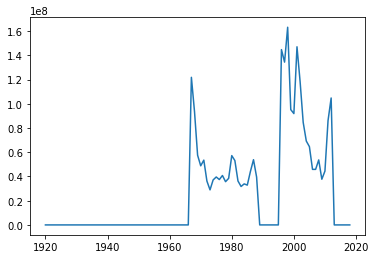

In [44]:
plt.plot(range(YMIN, YMAX-YWINDOW, YWINDOW), diffs)